In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

****xception****

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
83683744/83683744 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 batch_normalization_4 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1

357/357 [==============================] - ETA: 0s - loss: 5.7154 - accuracy: 0.8801
Testing loss: 3.9659006595611572, Testing accuracy: 0.9588414430618286

357/357 [==============================] - 132s 271ms/step - loss: 5.7154 - accuracy: 0.8801 - val_loss: 3.9583 - val_accuracy: 0.9527
Epoch 2/30
357/357 [==============================] - ETA: 0s - loss: 2.4152 - accuracy: 0.9709
Testing loss: 1.5018181800842285, Testing accuracy: 0.9786585569381714

357/357 [==============================] - 92s 257ms/step - loss: 2.4152 - accuracy: 0.9709 - val_loss: 1.4934 - val_accuracy: 0.9847
Epoch 3/30
357/357 [==============================] - ETA: 0s - loss: 1.0059 - accuracy: 0.9827
Testing loss: 0.6260820627212524, Testing accuracy: 0.9847561120986938

357/357 [==============================] - 95s 266ms/step - loss: 1.0059 - accuracy: 0.9827 - val_loss: 0.6135 - val_accuracy: 0.9878
Epoch 4/30
357/357 [==============================] - ETA: 0s - loss: 0.4439 - accuracy: 0.9891
Testing 

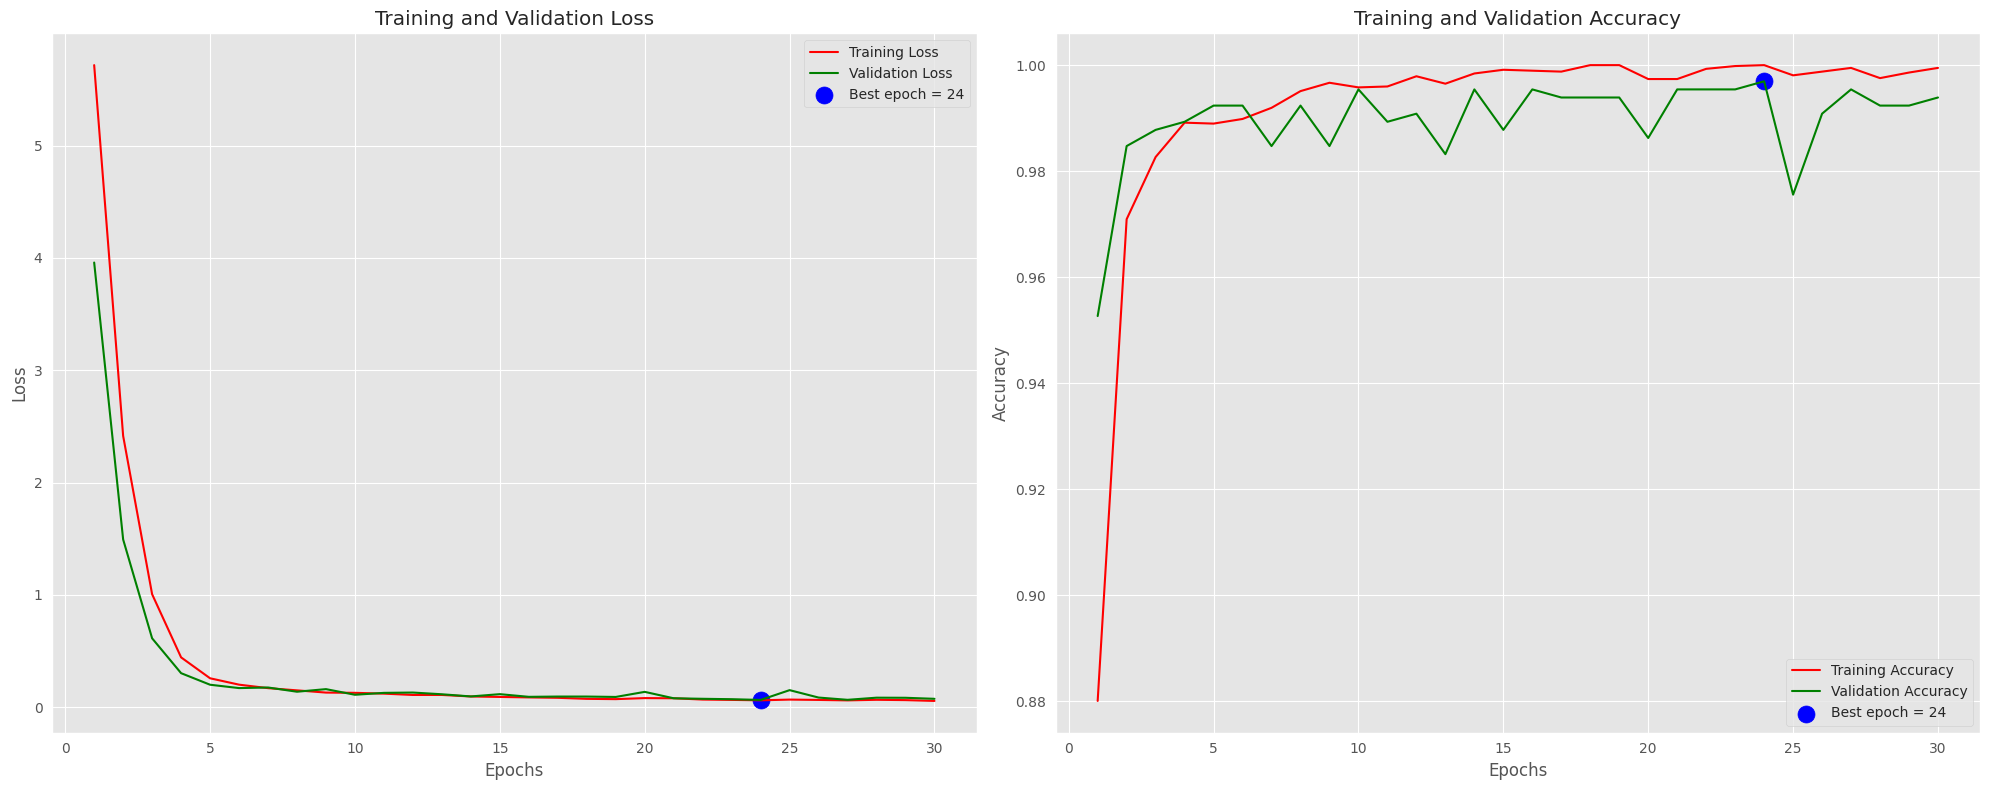

16/16 [==============================] - 1s 68ms/step - loss: 0.1538 - accuracy: 0.9766
Train Loss:  0.047025177627801895
Train Accuracy:  1.0
--------------------
Validation Loss:  0.06303277611732483
Validation Accuracy:  0.99609375
--------------------
Test Loss:  0.1538185179233551
Test Accuracy:  0.9765625
41/41 [==============================] - 3s 61ms/step


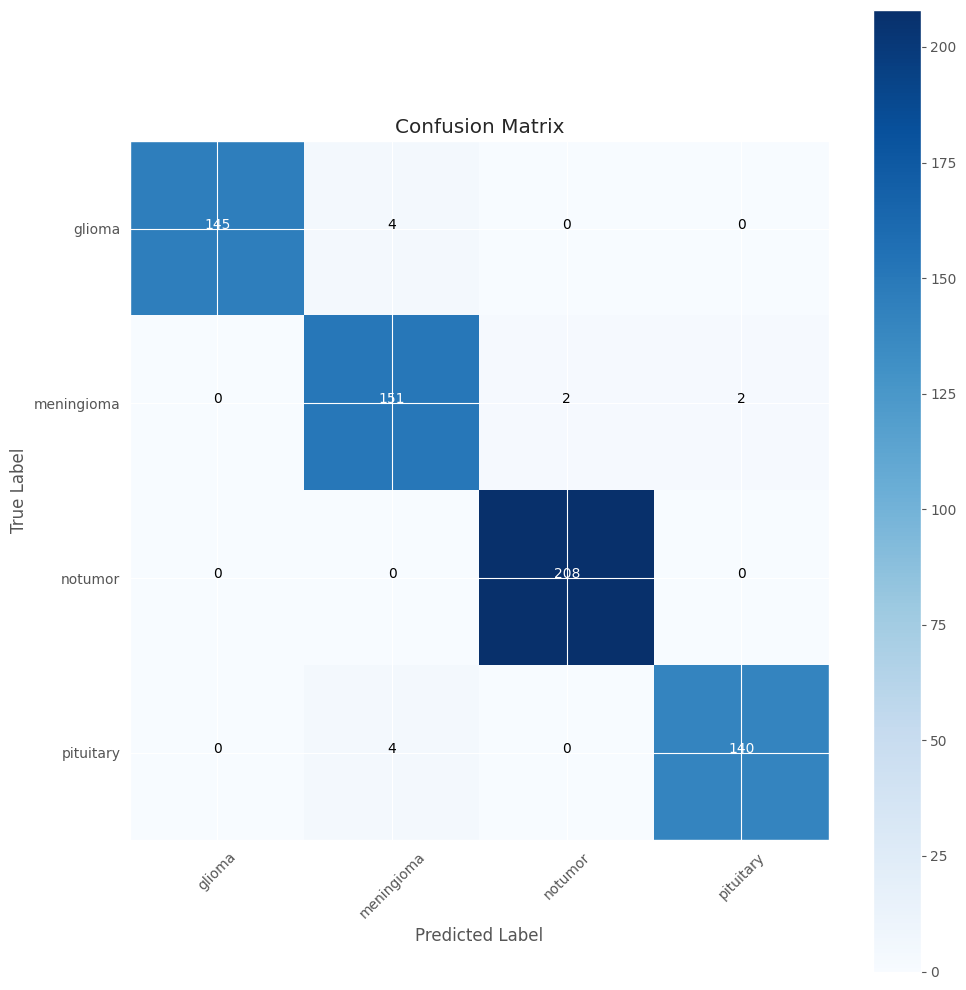

              precision    recall  f1-score   support

      glioma       1.00      0.97      0.99       149
  meningioma       0.95      0.97      0.96       155
     notumor       0.99      1.00      1.00       208
   pituitary       0.99      0.97      0.98       144

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656



In [2]:
import os
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras import regularizers

sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

# Paths to your training and testing data
train_data_path = '/content/Training'
test_data_path = '/content/Testing'

# Create dataframes for training and testing data
def create_dataframe(data_path):
    filepaths = []
    labels = []
    folds = os.listdir(data_path)
    for fold in folds:
        f_path = os.path.join(data_path, fold)
        filelists = os.listdir(f_path)
        for file in filelists:
            filepaths.append(os.path.join(f_path, file))
            labels.append(fold)
    Fseries = pd.Series(filepaths, name='filepaths')
    Lseries = pd.Series(labels, name='label')
    return pd.concat([Fseries, Lseries], axis=1)

train_df = create_dataframe(train_data_path)
test_df = create_dataframe(test_data_path)

# Split test data into validation and test sets
valid, test = train_test_split(test_df, train_size=0.5, shuffle=True, random_state=42)

img_size = (224, 224)
batch_size = 16

# ImageDataGenerators
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df, x_col='filepaths', y_col='label', target_size=img_size,
                                       class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
valid_gen = ts_gen.flow_from_dataframe(valid, x_col='filepaths', y_col='label', target_size=img_size,
                                       class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
test_gen = ts_gen.flow_from_dataframe(test, x_col='filepaths', y_col='label', target_size=img_size,
                                      class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)

img_shape = (img_size[0], img_size[1], 3)
classes = train_gen.class_indices
num_class = len(classes)

# Using Xception as base model
base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=img_shape, pooling='max')

model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer=regularizers.l2(0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.4, seed=75),
    Dense(num_class, activation='softmax')
])

model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

class TestAccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_acc = model.evaluate(test_gen, verbose=0)
        print(f'\nTesting loss: {test_loss}, Testing accuracy: {test_acc}\n')

Epochs = 30
history = model.fit(x=train_gen, epochs=Epochs, verbose=1, validation_data=valid_gen,
                    validation_steps=None, shuffle=False, callbacks=[TestAccuracyCallback()])

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i + 1 for i in range(len(train_acc))]

loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'

# Training history
plt.figure(figsize=(20, 8))
plt.style.use('ggplot')

plt.subplot(1, 2, 1)
plt.plot(Epochs, train_loss, 'r', label='Training Loss')
plt.plot(Epochs, val_loss, 'g', label='Validation Loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, val_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

train_score = model.evaluate(train_gen, steps=16, verbose=1)
valid_score = model.evaluate(valid_gen, steps=16, verbose=1)
test_score = model.evaluate(test_gen, steps=16, verbose=1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(test_gen.classes, y_pred, target_names=classes))

In [3]:
# Assuming the teacher model has already been trained and saved
teacher_model_path = 'teacher_model.h5'
model.save(teacher_model_path)  # Save the teacher model
teacher_model = tf.keras.models.load_model(teacher_model_path)

In [4]:
from tensorflow.keras.models import load_model

# Load the trained model
teacher_model = load_model('teacher_model.h5')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adamax

# Create student model structure
student_model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1), input_shape= img_shape),
    Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(512, activation=LeakyReLU(alpha=0.1)),
    Dense(256, activation=LeakyReLU(alpha=0.1)),
    Dense(num_class, activation='softmax')
])

student_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

student_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 conv2d_28 (Conv2D)          (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 conv2d_30 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                

In [6]:
import tensorflow.keras.backend as K

def distillation_loss(y_true, y_pred, teacher_logits, temperature=3, alpha=0.1):
    # Compute the distillation loss
    y_true = K.cast(y_true, 'float32')
    teacher_logits = K.cast(teacher_logits, 'float32')

    hard_loss = K.categorical_crossentropy(y_true, y_pred)
    soft_loss = K.categorical_crossentropy(
        K.softmax(teacher_logits / temperature),
        K.softmax(y_pred / temperature)
    )

    return alpha * hard_loss + (1 - alpha) * soft_loss

In [ ]:
# Custom training loop for distillation
class DistillationModel(tf.keras.Model):
    def __init__(self, student, teacher, temperature=3, alpha=0.1):
        super(DistillationModel, self).__init__()
        self.student = student
        self.teacher = teacher
        self.temperature = temperature
        self.alpha = alpha

    def compile(self, optimizer, metrics, student_loss_fn):
        super(DistillationModel, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn

    def train_step(self, data):
        x, y = data

        # Forward pass for teacher
        teacher_logits = self.teacher(x, training=False)

        # Forward pass for student
        with tf.GradientTape() as tape:
            student_logits = self.student(x, training=True)
            loss = distillation_loss(y, student_logits, teacher_logits, self.temperature, self.alpha)

        # Backward pass and optimize
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        self.compiled_metrics.update_state(y, student_logits)
        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        x, y = data
        y_pred = self.student(x, training=False)
        self.compiled_metrics.update_state(y, y_pred)
        return {m.name: m.result() for m in self.metrics}

# Instantiate and compile the distillation model
distillation_model = DistillationModel(student=student_model, teacher=teacher_model)
distillation_model.compile(
    optimizer=Adamax(learning_rate=0.001),
    metrics=['accuracy'],
    student_loss_fn='categorical_crossentropy'
)

# Train the distillation model
history = distillation_model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=30
)

Epoch 1/30
357/357 [==============================] - 55s 133ms/step - accuracy: 0.8711 - val_accuracy: 0.8580
Epoch 2/30
357/357 [==============================] - 45s 126ms/step - accuracy: 0.9233 - val_accuracy: 0.8763
Epoch 3/30
357/357 [==============================] - 44s 124ms/step - accuracy: 0.9329 - val_accuracy: 0.8962
Epoch 4/30
357/357 [==============================] - 45s 125ms/step - accuracy: 0.9501 - val_accuracy: 0.9023
Epoch 5/30
357/357 [==============================] - 44s 123ms/step - accuracy: 0.9576 - val_accuracy: 0.9023
Epoch 6/30
357/357 [==============================] - 44s 123ms/step - accuracy: 0.9643 - val_accuracy: 0.9221
Epoch 7/30
357/357 [==============================] - 44s 125ms/step - accuracy: 0.9734 - val_accuracy: 0.9389
Epoch 8/30
357/357 [==============================] - 44s 123ms/step - accuracy: 0.9839 - val_accuracy: 0.9420
Epoch 9/30
357/357 [==============================] - 45s 125ms/step - accuracy: 0.9851 - val_accuracy: 0.9420
E

In [ ]:
class DistillationModel(tf.keras.Model):
    def __init__(self, student, teacher, temperature=3, alpha=0.1):
        super(DistillationModel, self).__init__()
        self.student = student
        self.teacher = teacher
        self.temperature = temperature
        self.alpha = alpha

    def compile(self, optimizer, metrics, student_loss_fn):
        super(DistillationModel, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn

    def train_step(self, data):
        x, y = data

        # Forward pass for teacher
        teacher_logits = self.teacher(x, training=False)

        # Forward pass for student
        with tf.GradientTape() as tape:
            student_logits = self.student(x, training=True)
            loss = distillation_loss(y, student_logits, teacher_logits, self.temperature, self.alpha)

        # Backward pass and optimize
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        self.compiled_metrics.update_state(y, student_logits)
        return {'loss': loss, **{m.name: m.result() for m in self.metrics}}

    def test_step(self, data):
        x, y = data

        # Forward pass for student
        student_logits = self.student(x, training=False)
        loss = self.student_loss_fn(y, student_logits)

        self.compiled_metrics.update_state(y, student_logits)
        return {'loss': loss, **{m.name: m.result() for m in self.metrics}}

In [ ]:
test_score = distillation_model.evaluate(test_gen)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

41/41 [==============================] - 2s 36ms/step - accuracy: 0.9512


TypeError: 'float' object is not subscriptable

KeyError: 'loss'

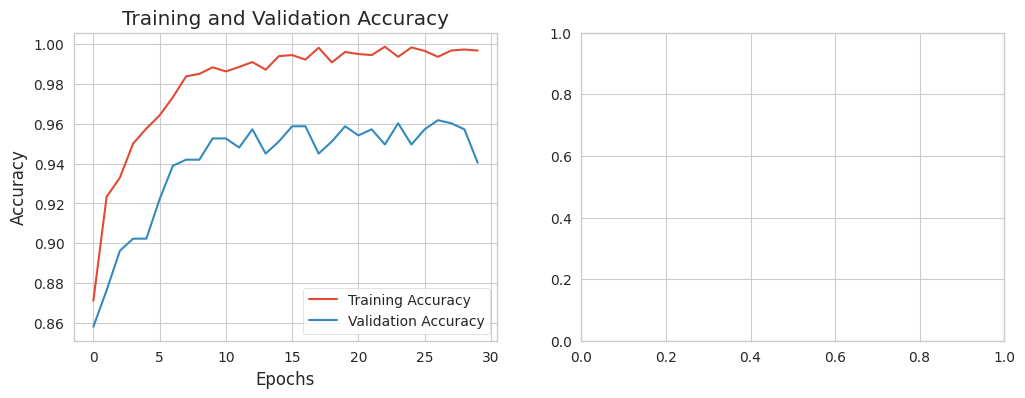

In [ ]:
# Plot the training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

KeyError: 'loss'

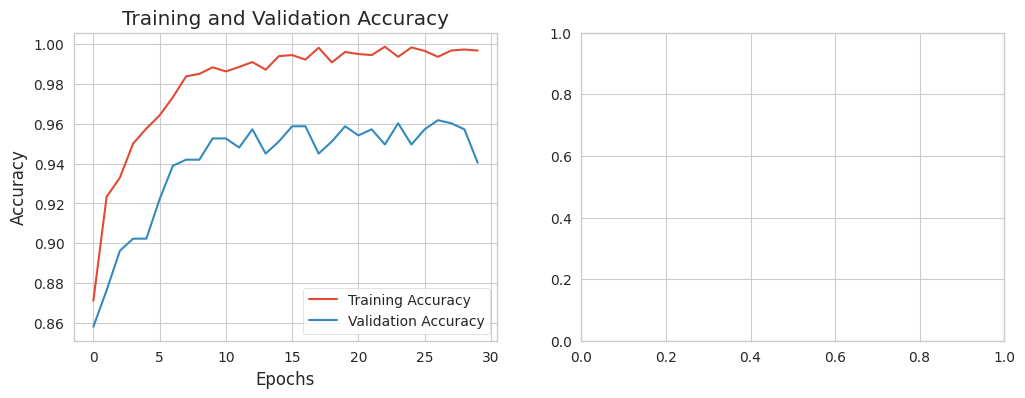

In [ ]:
# Save the trained student model
distillation_model.student.save('trained_student_model.h5')

# Load the trained student model
student_model = load_model('trained_student_model.h5')

# Plot the training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
test_score = distillation_model.evaluate(test_gen)
print("Test Loss: ", test_score['loss'])
print("Test Accuracy: ", test_score['accuracy'])

# Test the model and plot the results
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def plot_image_with_prediction(img_path, model, class_names):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create batch dimension

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    plt.imshow(img)
    plt.title(f'Predicted: {class_names[predicted_class]}')
    plt.axis('off')
    plt.show()

# List of class names
class_names = list(train_gen.class_indices.keys())

# Test with some images from the test set
test_images = test_df.sample(5)  # Randomly select 5 test images

for idx, row in test_images.iterrows():
    img_path = row['filepaths']
    plot_image_with_prediction(img_path, student_model, class_names)

In [ ]:

# Custom training loop for distillation
class DistillationModel(tf.keras.Model):
    def __init__(self, student, teacher, temperature=3, alpha=0.1):
        super(DistillationModel, self).__init__()
        self.student = student
        self.teacher = teacher
        self.temperature = temperature
        self.alpha = alpha

    def compile(self, optimizer, metrics, student_loss_fn):
        super(DistillationModel, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn

    def train_step(self, data):
        x, y = data

        # Forward pass for teacher
        teacher_logits = self.teacher(x, training=False)

        # Forward pass for student
        with tf.GradientTape() as tape:
            student_logits = self.student(x, training=True)
            loss = distillation_loss(y, student_logits, teacher_logits, self.temperature, self.alpha)

        # Backward pass and optimize
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        self.compiled_metrics.update_state(y, student_logits)
        return {'loss': loss, **{m.name: m.result() for m in self.metrics}}

    def test_step(self, data):
        x, y = data

        # Forward pass for student
        student_logits = self.student(x, training=False)
        loss = self.student_loss_fn(y, student_logits)

        self.compiled_metrics.update_state(y, student_logits)
        return {'loss': loss, **{m.name: m.result() for m in self.metrics}}

# Instantiate and compile the distillation model
distillation_model = DistillationModel(student=student_model, teacher=teacher_model)
distillation_model.compile(
    optimizer=Adamax(learning_rate=0.001),
    metrics=['accuracy'],
    student_loss_fn='categorical_crossentropy'
)

# Train the distillation model
history = distillation_model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10
)

Epoch 1/10
357/357 [==============================] - ETA: 0s - loss: 1.2439 - accuracy: 0.9842

TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "<ipython-input-24-6acf8c91f574>", line 38, in test_step
        loss = self.student_loss_fn(y, student_logits)

    TypeError: 'str' object is not callable


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Define and compile the student model
student_model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1), input_shape=img_shape),
    Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=LeakyReLU(alpha=0.1)),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(512, activation=LeakyReLU(alpha=0.1)),
    Dense(256, activation=LeakyReLU(alpha=0.1)),
    Dense(num_class, activation='softmax')
])

student_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

student_model.summary()

# Custom training loop for distillation
class DistillationModel(tf.keras.Model):
    def __init__(self, student, teacher, temperature=3, alpha=0.1):
        super(DistillationModel, self).__init__()
        self.student = student
        self.teacher = teacher
        self.temperature = temperature
        self.alpha = alpha

    def compile(self, optimizer, metrics, student_loss_fn):
        super(DistillationModel, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn

    def train_step(self, data):
        x, y = data

        # Forward pass for teacher
        teacher_logits = self.teacher(x, training=False)

        # Forward pass for student
        with tf.GradientTape() as tape:
            student_logits = self.student(x, training=True)
            loss = distillation_loss(y, student_logits, teacher_logits, self.temperature, self.alpha)

        # Backward pass and optimize
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        self.compiled_metrics.update_state(y, student_logits)
        return {'loss': loss, **{m.name: m.result() for m in self.metrics}}

    def test_step(self, data):
        x, y = data

        # Forward pass for student
        student_logits = self.student(x, training=False)
        loss = self.student_loss_fn(y, student_logits)

        self.compiled_metrics.update_state(y, student_logits)
        return {'loss': loss, **{m.name: m.result() for m in self.metrics}}

# Instantiate and compile the distillation model
distillation_model = DistillationModel(student=student_model, teacher=teacher_model)
distillation_model.compile(
    optimizer=Adamax(learning_rate=0.001),
    metrics=['accuracy'],
    student_loss_fn=CategoricalCrossentropy()
)

# Train the distillation model
history = distillation_model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=30
)

# Save the trained student model
distillation_model.student.save('trained_student_model.h5')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 conv2d_37 (Conv2D)          (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 112, 112, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 conv2d_39 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                

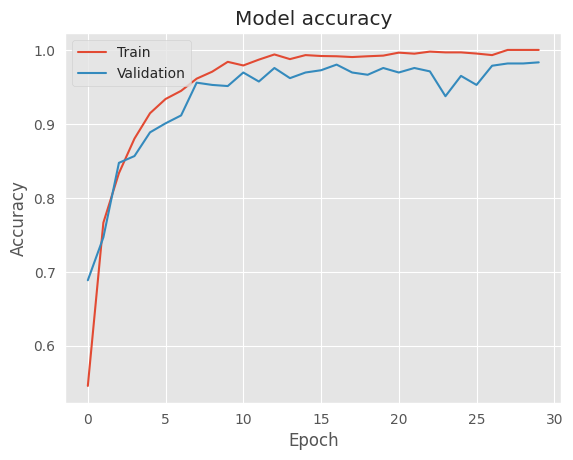

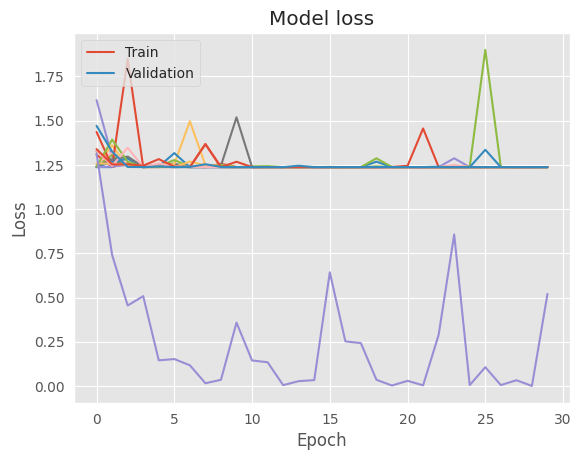

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()